# Task 1

In [3]:
import sys
sys.path.insert(0, '/Users/laerte/pam_ai/pam_ai/src')
import random
import matplotlib.pyplot as plt
import numpy as np


from Task_1.agent import GameAgent
from Task_1.grid import GameGrid
from Task_1.simple_search import SimpleSearch

### Initialise the objects

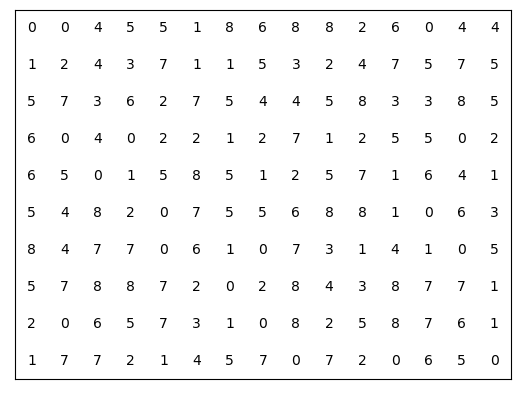

In [6]:
# The object GameAgent is employed to store agent position and the overall value of game movements
# It is initated given the initial position of the agent, i.e., (0,0) to make it start at left-upper corner
ag = GameAgent(0,0)

# The grid initiated and printed using the GameGrid class. 
# It requires as argumentes the vertical and horizontal dimensions of the grid
gd = GameGrid(10,15) 
gd.generate_grid()
gd.print_grid();


### Simple Search

Simple Search score: 56


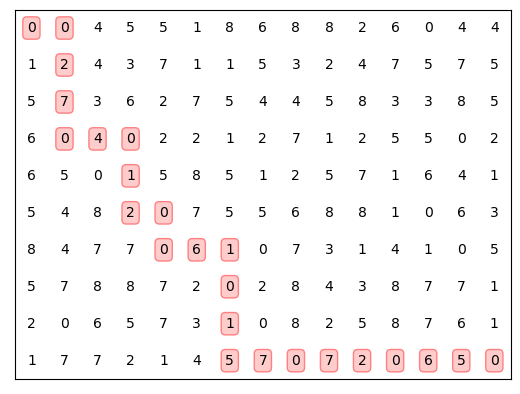

In [9]:
simple_search = SimpleSearch(ag,gd)
simple_search.compute_path()
gd.print_path(simple_search.visited_set)
print("Simple Search score: {}".format(ag.timer))

### Dijkstra Search


In [4]:
import numpy as np


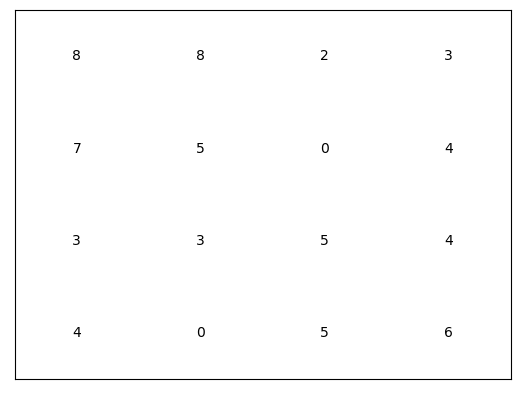

In [5]:
gd = GameGrid(4,4) 
gd.generate_grid()
gd.print_grid();
M = gd.grid


In [6]:
h = 3
w = 4

In [124]:
# Initiate variables

unvisited_set = set([ (i,j) for i in range(h+1) for j in range(w+1)])

distance_matrix = float("inf") * np.ones_like(M)  # type: ignore
distance_matrix[0,0] = 0

visited_set = {(0,0)}
unvisited_set.remove((0,0))

# Set current node
current_node = (0,0)

In [105]:
def update_distance(distance_matrix, M,w,h, i, j, current_node):
    """
    update_distance is used to updated the distance_matrix with new distance values, smaller than
    the previous ones
    
    """
    if (j > w   or i > h or i < 0 or j < 0 ):
        return  
    distance_matrix[i,j] = M[i,j] + distance_matrix[current_node]   
    return distance_matrix

In [125]:
current_node = (0,0)
keep_going = False

while keep_going:
    i = current_node[0]
    j = current_node[1]
    neighborhood = list()
    #print(i!=(h-1))
    if (i+1,j) in unvisited_set: update_distance(distance_matrix, M,w,h, i+1, j, current_node); neighborhood.append((i+1,j))

    if (i,j+1) in unvisited_set: update_distance(distance_matrix, M,w,h, i, j+1, current_node); neighborhood.append((i,j+1))
    #if j != w and (i-1,j) in unvisited_set: update_distance(distance_matrix, M,w,h, i-1, j, current_node); neighborhood.append((i-1,j))
    #if i != h and (i,j-1) in unvisited_set: update_distance(distance_matrix, M,w,h, i, j-1, current_node); neighborhood.append((i,j-1))

    #print(distance_matrix)

    find_min = list()
    for k in neighborhood:
        find_min.append(distance_matrix[k])
    
    next_node = neighborhood[find_min.index(min(find_min))]    
    print(next_node)

    unvisited_set.remove(next_node)
    visited_set.add(next_node)   # type: ignore 
    current_node = next_node
    keep_going = current_node == (h-1,w-1)